# Import Libraries and Data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('../input/digit-recognizer/train.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test = pd.read_csv('../input/digit-recognizer/test.csv')
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Class Distribution

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Frequency of Digits')

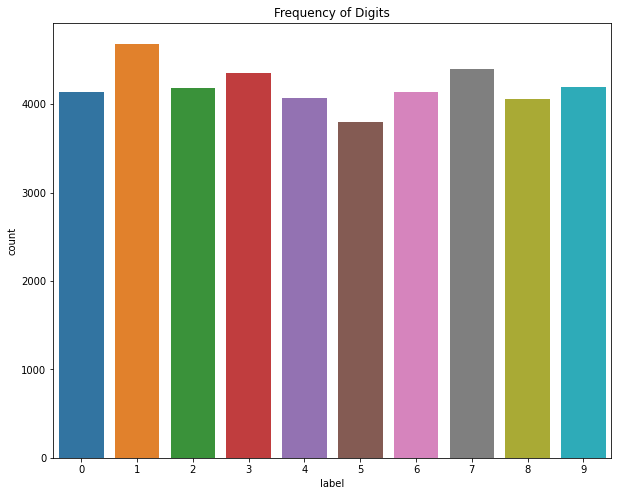

In [4]:
plt.figure(figsize=(10, 8))
sns.countplot(train.label)
plt.title('Frequency of Digits')

# Data Transformation

In [5]:
xtrain = train.drop('label', axis=1)
ytrain = train['label']

In [6]:
#xtrain = np.array(xtrain).reshape(-1, 28, 28, 1)
#test = np.array(test).reshape(-1, 28, 28, 1)
xtrain = xtrain/255
test = test/255

In [7]:
num_examples_train = xtrain.shape[0]
num_examples_test = test.shape[0]
n_h = 32
n_w = 32
n_c = 3

Train_input_images = np.zeros((num_examples_train, n_h, n_w, n_c))
Test_input_images = np.zeros((num_examples_test, n_h, n_w, n_c))

In [8]:
xtrain.shape

(42000, 784)

In [9]:
for example in range(num_examples_train):
    Train_input_images[example,:28,:28,0] = xtrain.iloc[example, :].values.reshape(28,28)
    Train_input_images[example,:28,:28,1] = xtrain.iloc[example, :].values.reshape(28,28)
    Train_input_images[example,:28,:28,2] = xtrain.iloc[example, :].values.reshape(28,28)
    
for example in range(num_examples_test):
    Test_input_images[example,:28,:28,0] = test.iloc[example, :].values.reshape(28,28)
    Test_input_images[example,:28,:28,1] = test.iloc[example, :].values.reshape(28,28)
    Test_input_images[example,:28,:28,2] = test.iloc[example, :].values.reshape(28,28)

In [10]:
import cv2
for x in range(Train_input_images.shape[0]):
    Train_input_images[x] = cv2.resize(Train_input_images[x], (32, 32))
    
for x in range(Test_input_images.shape[0]):
    Test_input_images[x] = cv2.resize(Test_input_images[x], (32, 32))
    

# Display Images with Shape

(<matplotlib.image.AxesImage at 0x7f95d504e3d0>, 1, (42000, 32, 32, 3))

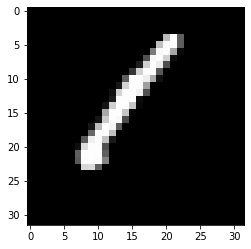

In [11]:
plt.imshow(Train_input_images[0]), ytrain[0], Train_input_images.shape

(<matplotlib.image.AxesImage at 0x7f95d4a48e90>, 1, (28, 28))

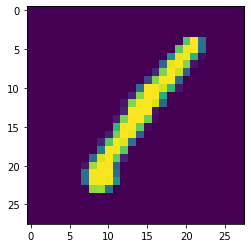

In [12]:
plt.imshow(np.array(xtrain)[0].reshape((28, 28))), ytrain[0], np.array(xtrain)[0].reshape((28, 28)).shape

# Train Test Split

In [13]:
from sklearn.model_selection import train_test_split #to split our dataset
xtrain, xtest, ytrain, ytest = train_test_split(Train_input_images, ytrain, test_size=0.1, random_state=123)

# VGG16 Model Training

In [14]:
from keras.models import Sequential
from keras.optimizers import adam_v2
from keras.utils.np_utils import to_categorical
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.preprocessing import image

In [15]:
def transferlearning(tl_model):
    
    # add new classifier layers
    flat1 = Flatten()(tl_model.layers[-1].output)
    class1 = Dense(1024, activation='relu')(flat1)
    output = Dense(10, activation='softmax')(class1)
    # define new model
    model = Model(inputs=tl_model.inputs, outputs=output)
    
    return model

In [16]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
vgg = VGG16(input_shape=(32, 32, 3), weights='imagenet', include_top=False)

for layer in vgg.layers:
    layer.trainable = False
    
vgg_model = transferlearning(vgg)

2022-11-20 02:11:26.545235: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-20 02:11:26.633588: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-20 02:11:26.634377: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-20 02:11:26.635870: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

58900480/58889256 [==============================] - 0s 0us/step


In [17]:
Optimizer = 'Adam'
vgg_model.compile(optimizer=Optimizer, 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [18]:
vgg_model.fit(xtrain, ytrain, epochs = 10, batch_size=20, validation_data = (xtest, ytest))

2022-11-20 02:11:30.895711: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-11-20 02:11:32.376184: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1890/1890 [==============================] - 20s 7ms/step - loss: 0.3195 - accuracy: 0.8968 - val_loss: 0.1925 - val_accuracy: 0.9407
Epoch 2/10
1890/1890 [==============================] - 13s 7ms/step - loss: 0.1721 - accuracy: 0.9423 - val_loss: 0.2095 - val_accuracy: 0.9276
Epoch 3/10
1890/1890 [==============================] - 13s 7ms/step - loss: 0.1428 - accuracy: 0.9517 - val_loss: 0.1486 - val_accuracy: 0.9552
Epoch 4/10
1890/1890 [==============================] - 13s 7ms/step - loss: 0.1282 - accuracy: 0.9570 - val_loss: 0.1191 - val_accuracy: 0.9626
Epoch 5/10
1890/1890 [==============================] - 13s 7ms/step - loss: 0.1146 - accuracy: 0.9603 - val_loss: 0.1319 - val_accuracy: 0.9536
Epoch 6/10
1890/1890 [==============================] - 13s 7ms/step - loss: 0.1032 - accuracy: 0.9650 - val_loss: 0.1149 - val_accuracy: 0.9626
Epoch 7/10
1890/1890 [==============================] - 13s 7ms/step - loss: 0.0980 - accuracy: 0.9672 - val_loss: 0.1044 - val_accuracy: 0.9

# Prediction on Test Dataset

In [19]:
result = vgg_model.predict(Test_input_images)
result = np.argmax(result, axis=1)
submission = pd.read_csv('../input/digit-recognizer/sample_submission.csv')
submission['Label'] = result
submission.to_csv('submission.csv', index=False)